#### Problem Statement:

To build a CNN model by training X-ray images of lungs affected by covid and not affected by covid, which would be helpful in predicting whether a person has covid or not using the X-ray images.

#### Importing Libraries:

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

#### Image Preprocessing:

In [2]:
# Ensuring that the train data will be scaled down, zoomed,sheared and horizontally flipped
train_datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [3]:
# Importing the train data and setting its size to 128x128
train_data=train_datagen.flow_from_directory("archive/images/train",target_size=(32, 32),batch_size=10,class_mode='binary')

Found 264 images belonging to 2 classes.


In [4]:
# Ensuring that the test data will be scaled down.
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
# Importing the train data and setting its size to 128x128
test_data=test_datagen.flow_from_directory("archive/images/test",target_size=(32, 32),batch_size=10,class_mode='binary')

Found 20 images belonging to 2 classes.


#### Building CNN Model:

In [6]:
#Initialising CNN model
cnn_model=Sequential()

#First Convolution Layer with 32 filters,2x2 kernel size,
cnn_model.add(Conv2D(32,kernel_size=2,activation='relu',input_shape=(32,32,3)))
#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))
#Adding Dropout to the layer
cnn_model.add(Dropout(0.2))

#Second Convolution Layer with 16 filters,2x2 kernel size,
cnn_model.add(Conv2D(16,kernel_size=2,activation='relu'))
#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))
#Adding Dropout to the layer
cnn_model.add(Dropout(0.2))

#Third Convolution Layer with 8 filters,2x2 kernel size,
cnn_model.add(Conv2D(8,kernel_size=2,activation='relu'))
#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))

#Flattening the layer before entering the dense layers
cnn_model.add(Flatten())

#Fully connected Neural Network
#First Dense layer
cnn_model.add(Dense(units=128,activation='relu'))
#Output layer
cnn_model.add(Dense(units=1,activation='sigmoid'))

In [7]:
#Entire structure of the CNN model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           5

#### Model Compile:

In [8]:
# Compiling the CNN model using optimizer 'Adam', loss as 'binary_crossentropy'and metrics as 'accuracy'.
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Training the Model :

In [9]:
my_model=cnn_model.fit_generator(train_data,steps_per_epoch=264//10,epochs=50,validation_data=test_data,validation_steps=20//10)

C:\Users\acer\.conda\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
26/26 [==============================] - 10s 371ms/step - loss: 0.6745 - accuracy: 0.6417 - val_loss: 0.6577 - val_accuracy: 0.7500
Epoch 2/50
26/26 [==============================] - 8s 324ms/step - loss: 0.6246 - accuracy: 0.7244 - val_loss: 0.5707 - val_accuracy: 1.0000
Epoch 3/50
26/26 [==============================] - 8s 322ms/step - loss: 0.5390 - accuracy: 0.7717 - val_loss: 0.4555 - val_accuracy: 0.8000
Epoch 4/50
26/26 [==============================] - 8s 323ms/step - loss: 0.5006 - accuracy: 0.7559 - val_loss: 0.4050 - val_accuracy: 0.8000
Epoch 5/50
26/26 [==============================] - 9s 341ms/step - loss: 0.4703 - accuracy: 0.7756 - val_loss: 0.3654 - val_accuracy: 0.9000
Epoch 6/50
26/26 [==============================] - 9s 365ms/step - loss: 0.3956 - accuracy: 0.8583 - val_loss: 0.2881 - val_accuracy: 1.0000
Epoch 7/50
26/26 [==============================] - 9s 356ms/step - loss: 0.3378 - accuracy: 0.8504 - val_loss: 0.2034 - val_accuracy: 1.0000
Epoch

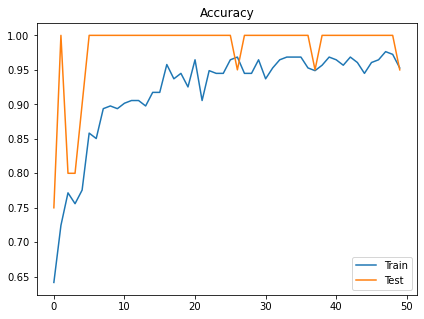

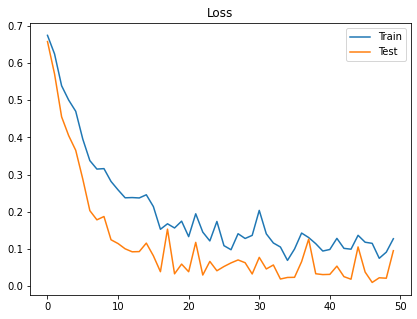

In [25]:
# Comparing performance metrics of the model
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(my_model.history['accuracy'],label='Train')
plt.plot(my_model.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.legend()

plt.figure(figsize=(15,5))
plt.subplot(122)
plt.plot(my_model.history['loss'],label='Train')
plt.plot(my_model.history['val_loss'],label='Test')
plt.title("Loss")
plt.legend()

#### Make a single Prediction:

#### 1. For Normal Lungs X-ray Image:

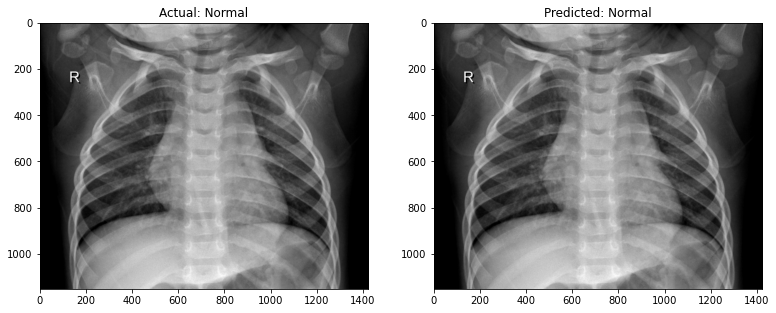

In [101]:
# Making predcitions of an Image to check if the lungs are affected by Covid or not
img1=cv2.imread("archive/images/test/normal/IM-0117-0001.jpeg")
test_image = image.load_img('archive/images/test/normal/IM-0117-0001.jpeg', target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image/255.)
train_data.class_indices
if result[0][0]>=0.5:
    prediction="Normal"
else:
    prediction="Corona"
    
plt.figure(figsize=(20,5))

plt.subplot(132)
plt.imshow(img1)
plt.title("Actual: Normal")

plt.subplot(133)
plt.imshow(img1)
plt.title("Predicted: {}".format(prediction))
plt.show()

#### 2. For Corona affected Lungs X-ray Image:

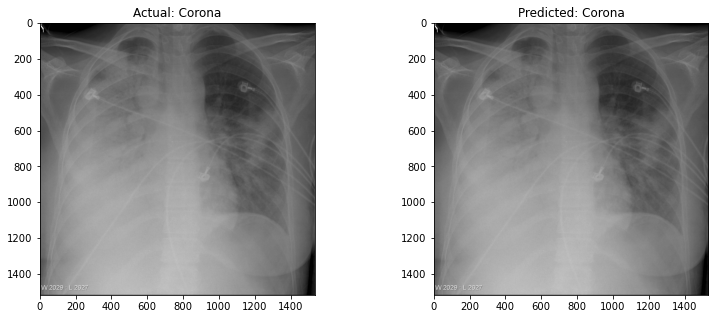

In [86]:
img2=cv2.imread("archive/images/test/corona/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg")
test_image2 = image.load_img('archive/images/test/corona/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg', target_size = (32, 32))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result = cnn_model.predict(test_image2/255.)
train_data.class_indices
if result[0][0]>=0.5:
    prediction="Normal"
else:
    prediction="Corona"

plt.figure(figsize=(20,5))

plt.subplot(132)
plt.imshow(img2)
plt.title("Actual: Corona")

plt.subplot(133)
plt.imshow(img2)
plt.title("Predicted: {}".format(prediction))
plt.show()

#### Conclusion:

- The CNN model built gave an accuracy of 95.2% on Train data and 95% on Test data which means the model has low bias and low variance
- Loss obtained is 0.12 on Train data and 0.09 on Test data.
- The model gives accurate prediction on both Normal $ Corona X-ray Images.